# Task 
# Car Price Prediction                                                                                                                               
with Machine Learning
The price of a car depends on a lot of factors like the goodwill of
the brand of the car,
features of the car, horsepower and the mileage it gives and
many more. Car price
prediction is one of the major research areas in machine
learning. 

# Imports Librarys

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

In [14]:
df = pd.read_csv("car data.csv")

# Basic information

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [17]:
df.shape

(301, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Handle categorical variables

In [23]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = ohe.fit_transform(df[categorical_features])
categorical_df = pd.DataFrame(categorical_data, columns=ohe.get_feature_names_out())

# Combine numerical and categorical data

In [24]:
df = df.drop(columns=categorical_features)
df = pd.concat([df, categorical_df], axis=1)

# Define features and target variable

In [31]:
X = df.drop(columns=['Selling_Price', 'Car_Name'])
y = df['Selling_Price']

# Split the data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features

In [34]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Train a Linear Regression model

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [36]:
y_pred = model.predict(X_test)


# Evaluate the model

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 1.3148837577539134
MSE: 3.5526176797354854
RMSE: 1.8848389002075179
R2 Score: 0.8457769683853144


# Visualize predictions

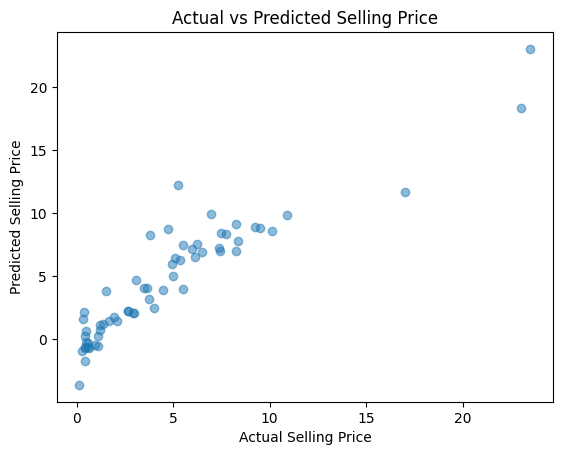

In [39]:
# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

# Train a Random Forest Regressor model

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions

In [42]:
y_pred = model.predict(X_test)

# Evaluate the model

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [44]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 0.9776049180327874
MSE: 2.429239694590164
RMSE: 1.5586018396595598
R2 Score: 0.8945440393557005


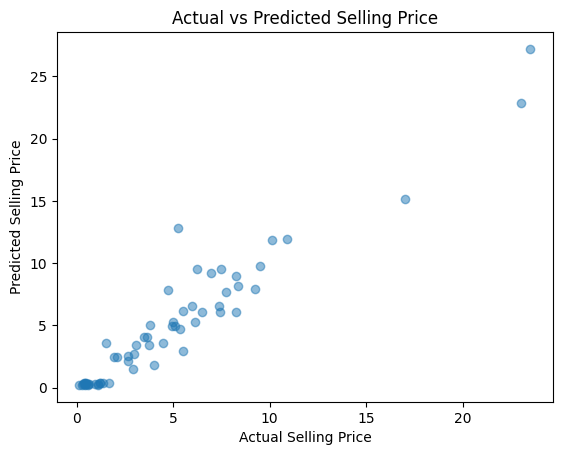

In [45]:
# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

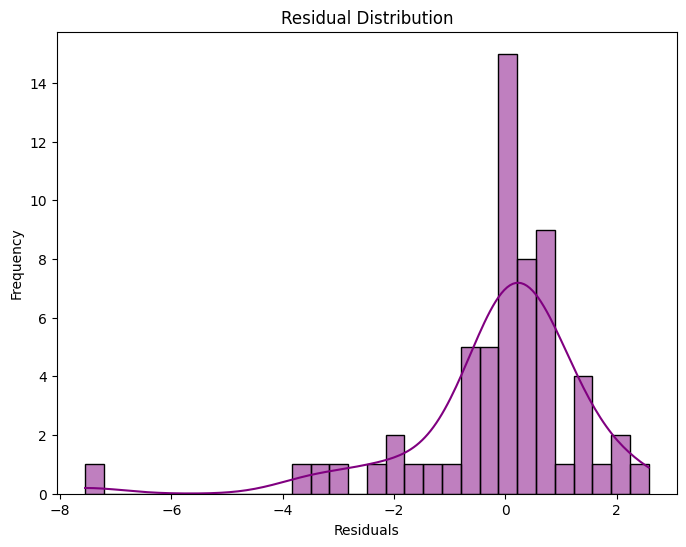

In [50]:
# Shows the errors (residuals = actual - predicted), ideally centered around zero.
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

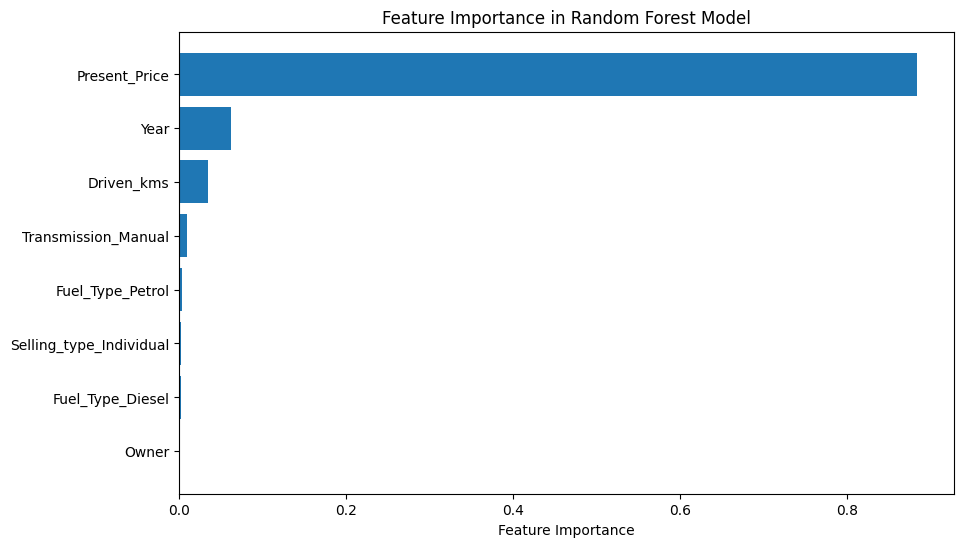

In [48]:
import numpy as np

feature_importances = model.feature_importances_
features = X.columns

sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


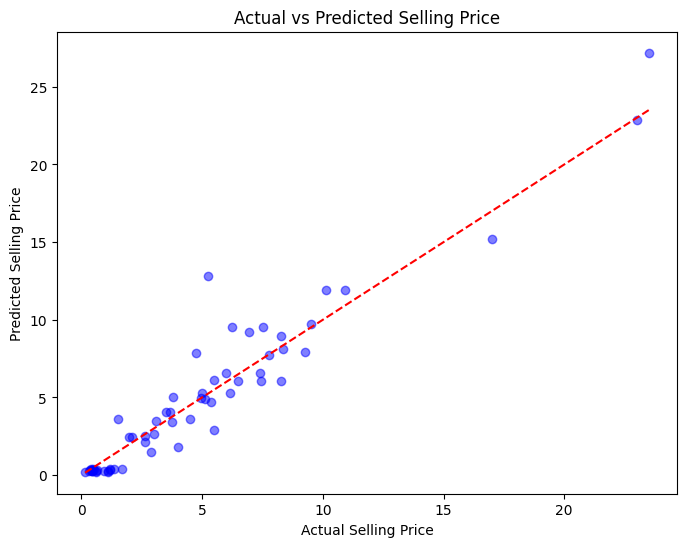

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect fit line
plt.show()


# Conclusion:Linear Regression vs. Random Forest Regressor                                                                             
In My Car Price Prediction project, I compared Linear Regression and Random Forest Regressor. Here’s how they performed:                                                                                                                                        
# Metric	Linear Regression	Random Forest Regressor                                                                                                 
 MAE     	   1.31	              0.98 (Better)                                                                                                         
 MSE           3.55	              2.43 (Better)                                                                                                         
 RMSE	       1.88	              1.56 (Better)                                                                                                         
 R² Score	   0.85	              0.89 (Better)                                                                                                         
                                                                                                                                                        
# Key Takeaways                                                                                                                                         
Random Forest Regressor performs better than Linear Regression in all metrics.                                                                          
Lower MAE and RMSE mean the Random Forest model makes more accurate price predictions.                                                                  
Higher R² Score (0.89 vs. 0.85) means Random Forest explains more variance in car prices.                                                               
Linear Regression assumes a linear relationship, while Random Forest captures complex patterns and interactions better.                